In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
dataset = pd.read_csv('thermal_conductivity_final.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_all = scaler.transform(X) 

In [5]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1)) 

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.0206 - mae: 0.7980 - val_loss: 0.0861 - val_mae: 0.2154
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0593 - mae: 0.1865 - val_loss: 0.0289 - val_mae: 0.1273
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0207 - mae: 0.1114 - val_loss: 0.0146 - val_mae: 0.0891
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0108 - mae: 0.0786 - val_loss: 0.0097 - val_mae: 0.0689
Epoch 5/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068 - mae: 0.0611 - val_loss: 0.0077 - val_mae: 0.0605
Epoch 6/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0048 - mae: 0.0515 - val_loss: 0.0059 - val_mae: 0.0544
Epoch 7/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039 - mae: 0.0465 - val_loss: 0.0046 - val_mae: 0.0474
Epoch 8/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035 - mae: 0.0424 - val_loss: 0.0040 - val_mae: 0.0439
Epoch 9/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [8]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = np.mean(np.abs((np.array(y_test) - np.array(y_test_pred)) / np.array(y_test))) * 100

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [9]:
print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"Mean Absolute Error on Test Set: {mae_test}")
print(f"R^2 Score on Test Set: {r2_test}")
print("Mean Absolute Percentage Error:", mape_test, "%")

Mean Squared Error on Test Set: 5.322529052768931e-06
Mean Absolute Error on Test Set: 0.0007338867808204254
R^2 Score on Test Set: 0.9878316098499031
Mean Absolute Percentage Error: 1.1892919811733131 %


In [10]:
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = np.mean(np.abs((np.array(y_train) - np.array(y_train_pred)) / np.array(y_train))) * 100

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
print(f"Mean Squared Error on Test Set: {mse_train}")
print(f"Mean Absolute Error on Test Set: {mae_train}")
print(f"R^2 Score on Test Set: {r2_train}")
print("Mean Absolute Percentage Error:", mape_train, "%")

Mean Squared Error on Test Set: 9.158915438245508e-07
Mean Absolute Error on Test Set: 0.000649182201279899
R^2 Score on Test Set: 0.9980031898818402
Mean Absolute Percentage Error: 1.2404046617362454 %


In [12]:
predictions = model.predict(X_all)

303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


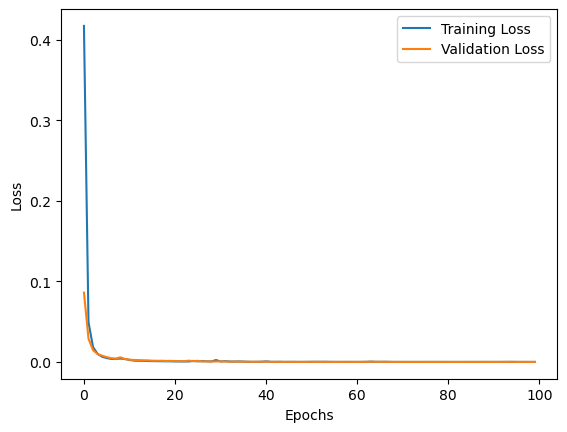

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

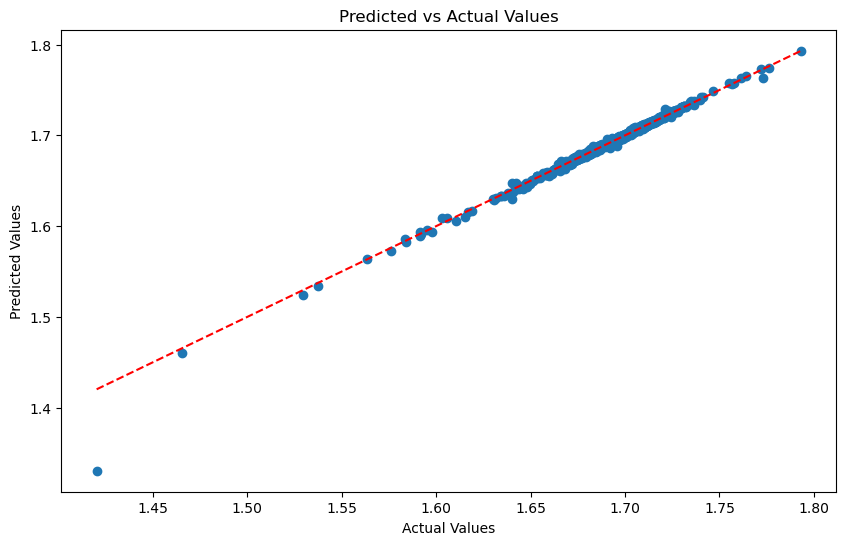

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

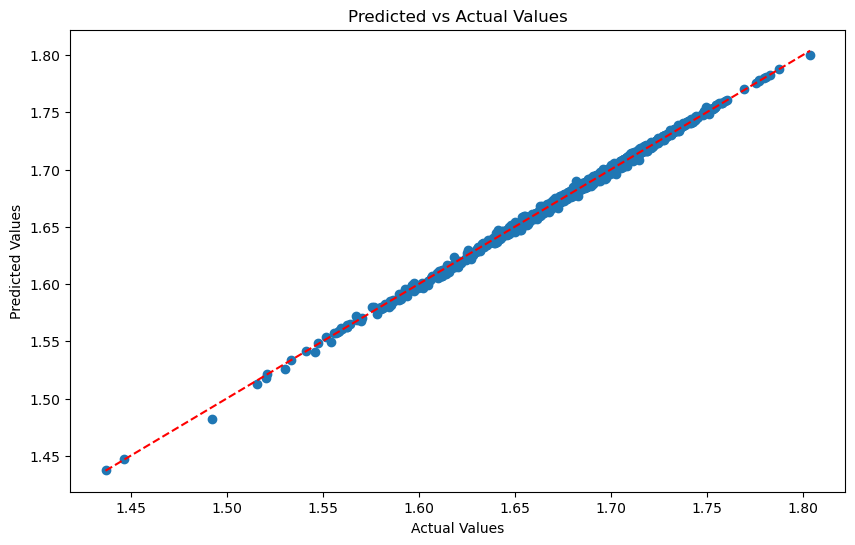

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

In [16]:
predictions = predictions.ravel()  # or use .flatten()

# Create a new DataFrame with predictions
new_df = pd.DataFrame({'Predictions': predictions})

# Join with the original dataset
joined_data = dataset.join(new_df)
print(joined_data.head())

         GR      DPHI      TNPH  TBIT10    TBIT20    TBIT30    TBIT60  \
0  133.2880  0.035372  0.061501  1950.0  876.0785  85.85635  236.7023   
1  141.2310  0.034830  0.061533  1950.0  797.6779  77.46809  207.2923   
2  137.1627  0.030458  0.060160  1950.0  488.2031  59.74663  119.4464   
3  140.2624  0.032882  0.059916  1950.0  633.6127  61.63119  132.2877   
4  151.1480  0.031895  0.059520  1950.0  803.0419  62.33526  161.0621   

      TBIT90  DTCO_MPS_FINAL  DTSH_PNS_FINAL      RHOB   YME_STA       UCS  \
0  1430.5400        56.94103        98.89021  2.591483  3.802793  16131.45   
1   720.5583        56.97847       100.58660  2.592007  3.885505  16482.31   
2   302.2662        57.15356       102.12170  2.595690  3.986692  16911.55   
3   319.1900        57.41502       103.30590  2.594137  4.044345  17156.11   
4   608.9658        57.77623       103.88680  2.598559  4.110643  17437.35   

       DTST    SLOANI    TIMANI  TXSG_ISO      TZSG   K(cond)  Predictions  
0  208.0918 -4.

In [17]:
dataset_thermal = pd.read_csv('thermal_conductivity.csv')

In [18]:
N = dataset_thermal.iloc[:, 0]
print(N)

0        6008.0
1        6008.5
2        6009.0
3        6009.5
4        6010.0
         ...   
9685    10890.0
9686    10890.5
9687    10891.0
9688    10891.5
9689    10892.0
Name: MD, Length: 9690, dtype: float64


In [19]:
new = pd.DataFrame({'Depth': N})
joined_data = joined_data.join(new)
joined_data.head()

,GR,DPHI,TNPH,TBIT10,TBIT20,TBIT30,TBIT60,TBIT90,DTCO_MPS_FINAL,DTSH_PNS_FINAL,...,YME_STA,UCS,DTST,SLOANI,TIMANI,TXSG_ISO,TZSG,K(cond),Predictions,Depth
0,133.2880,0.035372,0.061501,1950.0,876.0785,85.85635,236.7023,1430.5400,56.94103,98.89021,...,3.802793,16131.45,208.0918,-4.069155,0.818450,0.850168,1.103766,1.694190,1.694335,6008.0
1,141.2310,0.034830,0.061533,1950.0,797.6779,77.46809,207.2923,720.5583,56.97847,100.58660,...,3.885505,16482.31,208.0757,-4.029021,0.740217,0.848855,1.103768,1.695031,1.697432,6008.5
2,137.1627,0.030458,0.060160,1950.0,488.2031,59.74663,119.4464,302.2662,57.15356,102.12170,...,3.986692,16911.55,208.0272,-5.852238,0.642289,0.848307,1.103769,1.701835,1.701931,6009.0
3,140.2624,0.032882,0.059916,1950.0,633.6127,61.63119,132.2877,319.1900,57.41502,103.30590,...,4.044345,17156.11,207.9688,-4.997652,0.549908,0.845671,1.103771,1.698059,1.698546,6009.5
4,151.1480,0.031895,0.059520,1950.0,803.0419,62.33526,161.0621,608.9658,57.77623,103.88680,...,4.110643,17437.35,207.9688,-5.015064,0.419688,0.843553,1.103773,1.699596,1.700409,6010.0


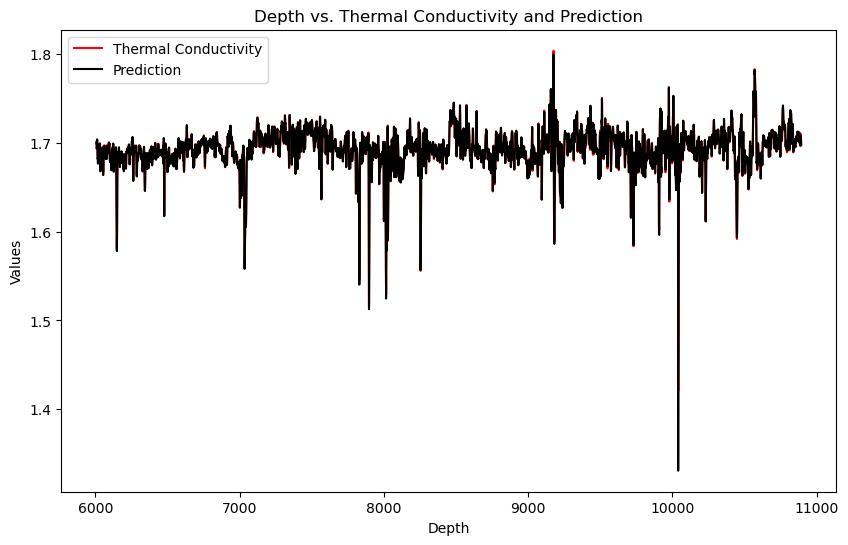

In [20]:
plt.figure(figsize=(10, 6))

# Plotting Heat Capacity vs. Depth
plt.plot(joined_data['Depth'], joined_data['K(cond)'], label='Thermal Conductivity', color='red')

# Plotting Prediction vs. Depth
plt.plot(joined_data['Depth'], joined_data['Predictions'], label='Prediction', color='black')

# Line of perfect prediction for Heat Capacity (y=x line assuming Prediction ideally matches Heat Capacity)


# Adding labels and legend
plt.xlabel('Depth')
plt.ylabel('Values')
plt.title('Depth vs. Thermal Conductivity and Prediction')
plt.legend()  # Automatically uses labels from each plot command

# Show the plot
plt.show()